# graphsage 원본

In [1]:
import graphsage

In [2]:
t = graphsage.SAGEConv(10, 4)
print(t)

SAGEConv(10, 4)


# make_test

## 더하기

In [5]:
from make_test import my_class
p = my_class(1, 2)
p.check_sum()

start_game
do_sum : 1 + 2 = 3
temp_sum : 1 + 2 = 3
check : True
end_game


In [8]:
sum_list = [
    [1, 2],
    [3, -1],
    [100, 20],
    [10, -70] ]

for x, y in enumerate(sum_list) :
    print('---------------{}번째-----------'.format(x+1))
    temp = my_class(y[0], y[1])
    temp.check_sum()

---------------1번째-----------
start_game
do_sum : 1 + 2 = 3
temp_sum : 1 + 2 = 3
check : True
end_game
---------------2번째-----------
start_game
do_sum : 3 + -1 = 2
temp_sum : 3 + -1 = 2
check : True
end_game
---------------3번째-----------
start_game
do_sum : 100 + 20 = 120
temp_sum : 100 + 20 = 120
check : True
end_game
---------------4번째-----------
start_game
do_sum : 10 + -70 = -60
temp_sum : 10 + -70 = -60
check : True
end_game


## 주소록

In [21]:
from make_test import Person

maria = Person('마리아', 20, '서울시 서초구')
maria.greeting()

안녕하세요 저는 서울시 서초구에 사는 20살 마리아입니다


In [22]:
import pandas as pd

people_info = [
    
    ['손흥민', 28, '영국 런던'],
    ['송중기', 36, '서울 어딘가'],
    ['꾸러기', 10, '양평']
]

people_info = pd.DataFrame(people_info)
people_info

,0,1,2
0,손흥민,28,영국 런던
1,송중기,36,서울 어딘가
2,꾸러기,10,양평


In [24]:
for x in range(len(people_info)) :
    
    print('----------{}번째 사람---------'.format(x+1))
    print()
    
    person_info = list(people_info.iloc[x,:])
    temp = Person(person_info[0], person_info[1], person_info[2])
    temp.greeting()
    
    print()


----------1번째 사람---------

안녕하세요 저는 영국 런던에 사는 28살 손흥민입니다

----------2번째 사람---------

안녕하세요 저는 서울 어딘가에 사는 36살 송중기입니다

----------3번째 사람---------

안녕하세요 저는 양평에 사는 10살 꾸러기입니다



## matrix _ linear

In [2]:
from make_test import my_matrix
import pandas as pd
import numpy as np

a = [[1, 2],
     [1, 2]]

# b = [[3],
#     [1]]

# c = [[-2],
#     [1]]

b = [3, 1]

c = [-2, 1]

a = np.array(a)
b = np.array(b)
c = np.array(c)

mat = my_matrix(a, b, c)
mat.shape()

mat.Linear()

matrix1.shape : (2, 2), matrix2.shape : (2,), matrix3.shape : (2,)
[5 5]
[3 6]


## 다중 상속

In [1]:
from make_test import father, mother, sister

girl = sister('아빠', '눈','엄마')
girl.handsome()
girl.kind()

아빠를 닮아 잘 생겼다.
눈 부분을 닮았네
엄마를 닮아 참 착하다.


# 연습_GCN

In [1]:
import numpy as np
import scipy.sparse as sp
import torch
import pandas as pd

## 전처리

In [2]:
# ABCDEFG
# 0123456

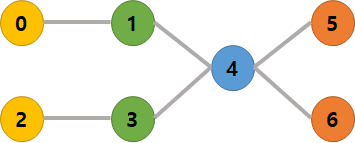

In [129]:
# 노드 연결 정보
edges = np.array([[0 ,1],
                 [2 ,3],
                 [1 ,4],
                 [3 ,4],
                 [4 ,5],
                 [4 ,6]])

# 각 노드 특성 정보(H) = 7 X 4
features = sp.csr_matrix([[1, 0, 0, 0],
                          [0, 1, 0, 0],
                          [1, 0, 0, 0],
                          [0, 1, 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1],
                          [0, 0, 0, 1]])

# edge 특성 정보
edge_features = [[3],
                 [5],
                 [1],
                 [10],
                 [6],
                 [8]]

# labels 
labels = np.array([1,
                  4,
                  5,
                  2,
                  6,
                  8,
                  7])

In [130]:
# direction matrix 생성
adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:,0], edges[:,1])),
             shape = (labels.shape[0], labels.shape[0]),
             dtype = np.float32)


## 확인
print('===단위행렬 더하기 전===')
print('{}'.format(adj))
print(adj.toarray())
print()

## 고려할 것 : 단위행렬(자기자신의 정보) 전달
#adj = adj + sp.eye(adj.shape[0])
#print('===단위행렬 더한 후===')
#print('{}'.format(adj))
#print(adj.toarray())

===단위행렬 더하기 전===
  (0, 1)	1.0
  (2, 3)	1.0
  (1, 4)	1.0
  (3, 4)	1.0
  (4, 5)	1.0
  (4, 6)	1.0
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]



In [131]:
def normalize(mx) :
    rowsum = np.array(mx.sum(1)) # 각 노드 정보 개수
    print('=====row별 feature 특성 합=====')
    print(rowsum)

    # r_inv
    # 역행렬로 np.power 수행
    r_inv = np.power(rowsum, 0).flatten() # 0, 1, # power : 0, 1, 8, 27, ,,, / 0, 1, 4, 9, ,,, / 0, 1, 0.5, 0.333, 0.25
    print('===== 역행렬로 np.power 수행 =====')
    r_inv[np.isinf(r_inv)] = 0 
    print(r_inv)


    # r_mat_inv
    r_mat_inv = sp.diags(r_inv) # 행렬로 만들어줌
    print(r_mat_inv.toarray())
    
    # 노드 adj 와 노드 feature 정보 행렬연산
    print('=====adj, feature 행렬곱=====')
    mx = r_mat_inv.dot(mx) 

    print(mx.toarray())
    return mx

In [132]:
# features : 현재 노드 + 연결된 노드 정보
features = normalize(features)

=====row별 feature 특성 합=====
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
===== 역행렬로 np.power 수행 =====
[1 1 1 1 1 1 1]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
=====adj, feature 행렬곱=====
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [133]:
adj = normalize(adj + sp.eye(adj.shape[0])) # 대각행렬

=====row별 feature 특성 합=====
[[2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [1.]
 [1.]]
===== 역행렬로 np.power 수행 =====
[1. 1. 1. 1. 1. 1. 1.]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
=====adj, feature 행렬곱=====
[[1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [7]:
idx_train = range(5)
features = torch.FloatTensor(np.array(features.todense()))
labels = torch.LongTensor(labels) # 원핫인코딩 된 label 중 해당하는 label이 몇 번 째인지
print(labels)

tensor([1, 4, 5, 2, 6, 8, 7])


In [8]:
def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)

    # 노드
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64)) # vstack : 행 추가

    # 노드 간 edge의 정보
    values = torch.from_numpy(sparse_mx.data) # numpy.ndarray를 tensor로 올려줌

    # 노드 개수, 특성 개수
    shape = torch.Size(sparse_mx.shape)

    return torch.sparse.FloatTensor(indices, values, shape) # sparse : 크기에 맞게 값을 뿌려주는 것 같은데 규칙 잘 모르겠다.

In [9]:
adj = sparse_mx_to_torch_sparse_tensor(adj)
adj

tensor(indices=tensor([[0, 0, 1, 2, 2, 3, 1, 3, 4, 4, 5, 4, 6],
                       [0, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       size=(7, 7), nnz=13, layout=torch.sparse_coo)

In [10]:
A = adj

## 모델링

In [21]:
def train(model, Loss, optimizer, num_epochs) :
    
    train_loss_arr = []
    test_loss_arr = []

    best_test_loss = 99999999
    # early stopping 걸어줌
    early_stop, early_stop_max = 0., 20.

    best_ACC = 0
    final_ACC = 0

    for epoch in range(1, num_epochs+1) :

        # forward pass
        model.train()
        output = model(features)
        train_loss = criterion(output[idx_train], labels[idx_train])

        # backward, optimize
        train_loss.backward()
        optimizer.step()

        # loss 따로 저장해두고
        train_loss_arr.append(train_loss.data)
        if epoch % 100 == 1 :
            print('epoch : ', epoch, 'train_loss : ', train_loss.item())
            
        

        print('End training')

In [22]:
import torch.nn as nn
import torch.optim as optim

class GCN_layer(nn.Module) :
    def __init__(self, in_features, out_features, A) :
        super(GCN_layer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.A = A
        self.fc = nn.Linear(in_features,
                            out_features)

    def forward(self, X) :
        print('------------X------------')
        print(X)

        print('--------self.A-----------') # torch.spmm이 알아서 self.A를 numpy array로 바꾸고  X랑 행렬곱을 진행함
        print(A)

        print('--------이웃정보종합-------')
        print(torch.spmm(self.A, X)) # A X X 행렬곱 한 값

        print('--------END_GCN_layer--------')
        
        return self.fc(torch.spmm(self.A, X)) # 이웃 정보를 종합한다.
    


class GCN(nn.Module) :
    def __init__(self, num_feature, num_class, A) : # feature개수, label개수
        super(GCN, self).__init__()
        self.feature_extractor = nn.Sequential( GCN_layer(num_feature, 16, A), # A : 
                                       nn.ReLU(),
                                       GCN_layer(16, num_class, A))

    def forward(self, X) :
        return self.feature_extractor(X)

In [23]:
labels.unique().size(0)

7

In [24]:
# GCN 학습 후 epoch에 따른 loss 확인
model = GCN(features.size(1), labels.unique().size(0), A)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
train(model, criterion, optimizer, 50)

NameError: name 'A' is not defined

In [15]:
model.eval()

output = model(features)

preds = output.max(1)[1].type_as(labels)
print('예측값 : {}'.format(preds))
print('실제값 : {}'.format(labels))

correct = preds.eq(labels).double()
correct = correct.sum()
print(correct / len(labels) * 100) 
# 10 , 100: 42.8571
# 1000 : 14.2857 ( 4로 수렴한다. )
# 500 : 28. 57~
# 10000 : 28.57

------------X------------
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]])
--------self.A-----------
tensor(indices=tensor([[0, 0, 1, 2, 2, 3, 1, 3, 4, 4, 5, 4, 6],
                       [0, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       size=(7, 7), nnz=13, layout=torch.sparse_coo)
--------이웃정보종합-------
tensor([[1., 1., 0., 0.],
        [0., 1., 1., 0.],
        [1., 1., 0., 0.],
        [0., 1., 1., 0.],
        [0., 0., 1., 2.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]])
--------END_GCN_layer--------
------------X------------
tensor([[0.0000, 0.2218, 1.1766, 0.0000, 1.2408, 0.0000, 0.2497, 2.3071, 0.0000,
         0.0680, 0.0400, 0.1231, 0.5789, 0.6298, 0.6331, 1.6679],
        [0.0000, 0.6639, 0.6106, 0.0000, 0.5333, 0.2435, 0.0606, 1.6713, 0.0000,
         1.0808, 

# SAGEConv

In [1]:
import numpy as np
import scipy.sparse as sp
import torch
import pandas as pd

## 전처리

In [2]:
# 노드 연결 정보
edges = np.array([[0 ,1],
                 [2 ,3],
                 [1 ,4],
                 [3 ,4],
                 [4 ,5],
                 [4 ,6]])

# 각 노드 특성 정보(H) = 7 X 4
features = sp.csr_matrix([[1, 0, 0, 0],
                          [0, 1, 0, 0],
                          [1, 0, 0, 0],
                          [0, 1, 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1],
                          [0, 0, 0, 1]])

# edge 특성 정보
edge_features = [[3],
                 [5],
                 [1],
                 [10],
                 [6],
                 [8]]

# labels 
labels = np.array([1,
                  4,
                  5,
                  2,
                  6,
                  8,
                  7])

In [3]:
# direction matrix 생성
adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:,0], edges[:,1])),
             shape = (labels.shape[0], labels.shape[0]),
             dtype = np.float32)


## 확인
print('===단위행렬 더하기 전===')
print('{}'.format(adj))
print(adj.toarray())
print()

## 고려할 것 : 단위행렬(자기자신의 정보) 전달
#adj = adj + sp.eye(adj.shape[0])
#print('===단위행렬 더한 후===')
#print('{}'.format(adj))
#print(adj.toarray())

===단위행렬 더하기 전===
  (0, 1)	1.0
  (2, 3)	1.0
  (1, 4)	1.0
  (3, 4)	1.0
  (4, 5)	1.0
  (4, 6)	1.0
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]



In [4]:
def normalize(mx) :
    rowsum = np.array(mx.sum(1)) # 각 노드 정보 개수
    print('=====row별 feature 특성 합=====')
    print(rowsum)

    # r_inv
    # 역행렬로 np.power 수행
    r_inv = np.power(rowsum, 0).flatten() # 0, 1, # power : 0, 1, 8, 27, ,,, / 0, 1, 4, 9, ,,, / 0, 1, 0.5, 0.333, 0.25
    print('===== 역행렬로 np.power 수행 =====')
    r_inv[np.isinf(r_inv)] = 0 
    print(r_inv)


    # r_mat_inv
    r_mat_inv = sp.diags(r_inv) # 행렬로 만들어줌
    print(r_mat_inv.toarray())
    
    # 노드 adj 와 노드 feature 정보 행렬연산
    print('=====adj, feature 행렬곱=====')
    mx = r_mat_inv.dot(mx) 

    print(mx.toarray())
    return mx

In [5]:
# features : 현재 노드 + 연결된 노드 정보
features = normalize(features)

=====row별 feature 특성 합=====
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
===== 역행렬로 np.power 수행 =====
[1 1 1 1 1 1 1]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
=====adj, feature 행렬곱=====
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [6]:
adj = normalize(adj + sp.eye(adj.shape[0])) # 대각행렬

=====row별 feature 특성 합=====
[[2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [1.]
 [1.]]
===== 역행렬로 np.power 수행 =====
[1. 1. 1. 1. 1. 1. 1.]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
=====adj, feature 행렬곱=====
[[1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [7]:
idx_train = range(5)
features = torch.FloatTensor(np.array(features.todense()))
labels = torch.LongTensor(labels) # 원핫인코딩 된 label 중 해당하는 label이 몇 번 째인지
print(labels)

tensor([1, 4, 5, 2, 6, 8, 7])


In [8]:
def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)

    # 노드
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64)) # vstack : 행 추가

    # 노드 간 edge의 정보
    values = torch.from_numpy(sparse_mx.data) # numpy.ndarray를 tensor로 올려줌

    # 노드 개수, 특성 개수
    shape = torch.Size(sparse_mx.shape)

    return torch.sparse.LongTensor(indices, values, shape) # sparse : 크기에 맞게 값을 뿌려주는 것 같은데 규칙 잘 모르겠다.

In [9]:
adj = sparse_mx_to_torch_sparse_tensor(adj)
adj

tensor(indices=tensor([[0, 0, 1, 2, 2, 3, 1, 3, 4, 4, 5, 4, 6],
                       [0, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       size=(7, 7), nnz=13, layout=torch.sparse_coo)

In [10]:
A = adj

## 모델링

In [11]:
from raw_graphsage import SAGEConv

model = SAGEConv(4, 7)
model(features, edge_index = A)

in_channels : (4, 4)
lin_l : Linear(in_features=4, out_features=7, bias=True)
lin_r : Linear(in_features=4, out_features=7, bias=False)
tensor(indices=tensor([[0, 0, 1, 2, 2, 3, 1, 3, 4, 4, 5, 4, 6],
                       [0, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       size=(7, 7), nnz=13, layout=torch.sparse_coo)
(tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]]), tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]]))


AssertionError: 

In [65]:
from torch_geometric.nn import SAGEConv

model = SAGEConv(4, 7)
model(features, edge_index = A)

AssertionError: 

In [12]:
from torch_geometric.nn import SAGEConv


SAGEConv(4, 7)
SAGEConv.forward
#SAGEConv.message 
#SAGEConv.message_and_aggregate # self, adj_t, x


<function torch_geometric.nn.conv.sage_conv.SAGEConv.forward(self, x: Union[torch.Tensor, Tuple[torch.Tensor, Union[torch.Tensor, NoneType]]], edge_index: Union[torch.Tensor, torch_sparse.tensor.SparseTensor], size: Union[Tuple[int, int], NoneType] = None) -> torch.Tensor>

In [35]:
def train(model, Loss, optimizer, num_epochs) :
    
    train_loss_arr = []
    test_loss_arr = []

    best_test_loss = 99999999
    # early stopping 걸어줌
    early_stop, early_stop_max = 0., 20.

    best_ACC = 0
    final_ACC = 0

    for epoch in range(1, num_epochs+1) :

        # forward pass
        model.train()
        output = model(features) #input
        train_loss = criterion(output[idx_train], labels[idx_train])

        # backward, optimize
        train_loss.backward()
        optimizer.step()

        # loss 따로 저장해두고
        train_loss_arr.append(train_loss.data)
        
        if epoch % 100 == 1 :
            print('epoch : ', epoch, 'train_loss : ', train_loss.item())

        print('End training')

### 쌓을 때

In [36]:
from torch_geometric.nn import SAGEConv
import torch.nn as nn
from torch import optim


class SAGENet(torch.nn.Module) :
    def __init__(self, num_feature, num_class, A) :
        super(SAGENet, self).__init__()
        torch.manual_seed(12345)
        
        self.feature_extractor = nn.Sequential(SAGEConv(num_feature, 16, A),
                                              nn.ReLU(),
                                              SAGEConv(16, num_class, A))
        
#        mlp1 = ###
#        self.conv1 = SAGEConv(###)
#        mlp2 = ###
#        self.conv2 = SAGEConv(###)
#        self.classifier = Linear(32, )###)
                                 
    def forward(self, X) :
        
        return self.feature_extractor(X)
    
#        edge_index = knn_graph(pos, k=16, batch = batch, loop = False)
                                 
#        x = self.conv1(x = None, edge_index = edge_index)
#        x = x.relu()
#        x = self.conv2(x = x, edge_index = edge_index)
#        x = x.relu()
            
#        x = global_max_pool(x, batch)
        
            
        # return self.classifier(x)
            
model = SAGENet(4, 7, adj)
print(model)

SAGENet(
  (feature_extractor): Sequential(
    (0): SAGEConv(4, 16)
    (1): ReLU()
    (2): SAGEConv(16, 7)
  )
)


In [41]:
A

tensor(indices=tensor([[0, 0, 1, 2, 2, 3, 1, 3, 4, 4, 5, 4, 6],
                       [0, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       size=(7, 7), nnz=13, layout=torch.sparse_coo)

In [38]:
model = SAGEConv(features.size(1), labels.unique().size(0))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
train(model, criterion, optimizer, 1)

TypeError: forward() missing 1 required positional argument: 'edge_index'

# 대기

In [1]:
from new_graphsage import SAGE

SAGE(10, 4)

-------------------reset_parameters----------------------


SAGE(10, 4)

# 

## 전처리

In [62]:
import numpy as np
import scipy.sparse as sp
import torch
import pandas as pd

#노드 연결 정보
edges = np.array([[0 ,1],
                 [2 ,3],
                 [1 ,4],
                 [3 ,4],
                 [4 ,5],
                 [4 ,6]])

# 각 노드 특성 정보(H) = 7 X 4
features = sp.csr_matrix([[1, 0, 0, 0],
                          [0, 1, 0, 0],
                          [1, 0, 0, 0],
                          [0, 1, 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1],
                          [0, 0, 0, 1]])

# edge 특성 정보
edge_features = [[3],
                 [5],
                 [1],
                 [10],
                 [6],
                 [8]]

# labels 
labels = np.array([1,
                  4,
                  5,
                  2,
                  6,
                  3,
                  0])

In [63]:
import torch
from torch_geometric.data import Data
edge_index = torch.tensor([[0 ,1],
                             [2 ,3],
                             [1 ,4],
                             [3 ,4],
                             [4 ,5],
                             [4 ,6]], dtype=torch.long)
x = torch.tensor([[0], [1], [2], [3], [4], [5], [6]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
data

# edge 개수 : 6
# node 개수 : 7

Data(edge_index=[6, 2], x=[7, 1])

In [64]:
# 단위 행렬 더해주기
# direction matrix 생성
adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:,0], edges[:,1])),
             shape = (labels.shape[0], labels.shape[0]),
             dtype = np.float32)


## 확인
print('===단위행렬 더하기 전===')
print('{}'.format(adj))
print(adj.toarray())
print()

## 고려할 것 : 단위행렬(자기자신의 정보) 전달
#adj = adj + sp.eye(adj.shape[0])
#print('===단위행렬 더한 후===')
#print('{}'.format(adj))
#print(adj.toarray())


===단위행렬 더하기 전===
  (0, 1)	1.0
  (2, 3)	1.0
  (1, 4)	1.0
  (3, 4)	1.0
  (4, 5)	1.0
  (4, 6)	1.0
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]



In [65]:
def normalize(mx) :
    rowsum = np.array(mx.sum(1)) # 각 노드 정보 개수
    print('=====row별 feature 특성 합=====')
    print(rowsum)

    # r_inv
    # 역행렬로 np.power 수행
    r_inv = np.power(rowsum, 0).flatten() # 0, 1, # power : 0, 1, 8, 27, ,,, / 0, 1, 4, 9, ,,, / 0, 1, 0.5, 0.333, 0.25
    print('===== 역행렬로 np.power 수행 =====')
    r_inv[np.isinf(r_inv)] = 0 
    print(r_inv)


    # r_mat_inv
    r_mat_inv = sp.diags(r_inv) # 행렬로 만들어줌
    print(r_mat_inv.toarray())
    
    # 노드 adj 와 노드 feature 정보 행렬연산
    print('=====adj, feature 행렬곱=====')
    mx = r_mat_inv.dot(mx) 

    print(mx.toarray())
    return mx

In [66]:
# num_nodes = max + 1 = 7
# num_edges = len(edges) = 6

num_nodes = 7
num_edges = len(edges)

# direction matrix 생성
adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                    shape=(labels.shape[0], labels.shape[0]),
                    dtype=np.float32)

## 고려할 것 : 단위행렬(자기자신의 정보) 전달
adj = adj + sp.eye(adj.shape[0])
print('===단위행렬 더한 후===')
print(adj.toarray())

# edge정보를 어떻게 맞춰줄것인가_dimension

# 행렬곱을 위한 array 
adj_arr = adj.toarray()
features_arr = features.toarray()

# hop 에 따라 정보 전달
hop = 2
for idx in range(hop) :
    features_arr = np.matmul(adj_arr, features_arr) # 여기에 weight 곱하기, bias 더하기
    print('======{0}번째======'.format(idx+1))
    print('{}'.format(features_arr))
    
    
# feature 정보 학습, label regression

===단위행렬 더한 후===
[[1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
======1번째======
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
======2번째======
[[1. 2. 1. 0.]
 [0. 1. 2. 2.]
 [1. 2. 1. 0.]
 [0. 1. 2. 2.]
 [0. 0. 1. 4.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [67]:
# features : 현재 노드 + 연결된 노드 정보
features = normalize(features)

adj = normalize(adj + sp.eye(adj.shape[0])) # 대각행렬

idx_train = range(5)
features = torch.FloatTensor(np.array(features.todense()))
labels = torch.LongTensor(labels) # 원핫인코딩 된 label 중 해당하는 label이 몇 번 째인지
print(labels)


=====row별 feature 특성 합=====
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
===== 역행렬로 np.power 수행 =====
[1 1 1 1 1 1 1]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
=====adj, feature 행렬곱=====
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
=====row별 feature 특성 합=====
[[3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [2.]
 [2.]]
===== 역행렬로 np.power 수행 =====
[1. 1. 1. 1. 1. 1. 1.]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
=====adj, feature 행렬곱=====
[[2. 1. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 1. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 0. 2. 1. 0. 0.]
 [0. 0. 0. 0. 2. 1. 1.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]
tensor([1, 4, 5, 2, 6, 3, 0])


In [68]:
def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)

    # 노드
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64)) # vstack : 행 추가

    # 노드 간 edge의 정보
    values = torch.from_numpy(sparse_mx.data) # numpy.ndarray를 tensor로 올려줌

    # 노드 개수, 특성 개수
    shape = torch.Size(sparse_mx.shape)

    return torch.sparse.FloatTensor(indices, values, shape) # sparse : 크기에 맞게 값을 뿌려주는 것 같은데 규칙 잘 모르겠다.

In [69]:
adj = sparse_mx_to_torch_sparse_tensor(adj)
adj

tensor(indices=tensor([[0, 0, 1, 2, 2, 3, 1, 3, 4, 4, 5, 4, 6],
                       [0, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6]]),
       values=tensor([2., 1., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2.]),
       size=(7, 7), nnz=13, layout=torch.sparse_coo)

## modeling_classification

In [45]:
# gpu 연결
import torch
torch.manual_seed(777)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [94]:
import torch
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree

linear1 = torch.nn.Linear(7, 7, bias=True)
activate = torch.nn.ReLU()

model = torch.nn.Sequential(linear1, activate)

# define cost / loss & optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1)

for step in range(100):
    optimizer.zero_grad()
    hypothesis = model(adj)

    # cost/loss function
    cost = criterion(hypothesis, labels)
    
    print('epoch = {}, {}, cost : {}'.format(step, (hypothesis > 0.5).float(), cost.item()))
    
    cost.backward()
    optimizer.step()

#     if step % 1000 == 0:
#         print(step, cost.item())

epoch = 0, tensor([[0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0.],
        [1., 1., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 0., 1., 0., 0.]]), cost : 2.0560359954833984
epoch = 1, tensor([[0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0.]]), cost : 1.1990779638290405
epoch = 2, tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.]]), cost : 0.8610450625419617
epoch = 3, tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.]

In [95]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(adj)
    predicted = (hypothesis > 0.5).float()
    print(predicted)
    accuracy = (predicted == labels).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), 
          '\nCorrect: ', predicted.detach().cpu().numpy(), 
          '\nAccuracy: ', accuracy.item() * 100, '%')

tensor([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.]])

Hypothesis:  [[ 0.        0.        0.        0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.       10.997732  0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        0.      ]
 [ 0.        0.       12.962054  0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        0.      ]
 [ 0.        0.        0.       17.623104  0.        0.        0.      ]
 [21.348667  0.        0.        0.        0.        0.        0.      ]] 
Correct:  [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]] 
Accuracy:  16.326530277729

## modeling_Regression

In [103]:
data = pd.read_csv('02_Linear_Regression_Model_Data.csv')
data

,Unnamed: 0,x,y
0,0,1.0,1.619379
1,1,2.0,1.857290
2,2,3.0,2.628194
3,3,4.0,2.725426
4,4,5.0,3.498926
5,5,6.0,3.867042
6,6,7.0,4.934539
7,7,8.0,4.864829
8,8,9.0,5.241539
9,9,10.0,5.823689


In [104]:
x_data = torch.FloatTensor(data.iloc[:,1])
y_data = torch.FloatTensor(data.iloc[:,2])

In [105]:
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

hypothesis = x_data * W + b

cost = torch.mean((hypothesis-y_data) ** 2)

optimizer = optim.SGD([W,b], lr = 0.01)

np_epochs = 1000


for i in range(np_epochs + 1 ) :
    
    # H(x)
    hypothesis = x_data * W + b
    print(hypothesis)
    
    # cost 계산
    cost = torch.mean((hypothesis - y_data)**2)

    # cost로 H 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    

    
    if i % 100 == 0 :
        print('Epoch : ', i, 'cost : ', cost.item())
        
        
plt.xlim(0, 11);    plt.ylim(0, 8)
plt.title('02_Linear_Regression_Model_Data')
plt.scatter(x_data, y_data)

plt.show()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<AddBackward0>)
Epoch :  0 cost :  15.700907707214355
tensor([0.5615, 1.0489, 1.5363, 2.0236, 2.5110, 2.9984, 3.4858, 3.9731, 4.4605,
        4.9479], grad_fn=<AddBackward0>)
tensor([0.6845, 1.2758, 1.8671, 2.4584, 3.0497, 3.6411, 4.2324, 4.8237, 5.4150,
        6.0063], grad_fn=<AddBackward0>)
tensor([0.7135, 1.3266, 1.9398, 2.5529, 3.1660, 3.7792, 4.3923, 5.0054, 5.6186,
        6.2317], grad_fn=<AddBackward0>)
tensor([0.7224, 1.3397, 1.9571, 2.5745, 3.1918, 3.8092, 4.4265, 5.0439, 5.6612,
        6.2786], grad_fn=<AddBackward0>)
tensor([0.7270, 1.3448, 1.9626, 2.5804, 3.1982, 3.8160, 4.4339, 5.0517, 5.6695,
        6.2873], grad_fn=<AddBackward0>)
tensor([0.7306, 1.3481, 1.9655, 2.5830, 3.2005, 3.8179, 4.4354, 5.0529, 5.6703,
        6.2878], grad_fn=<AddBackward0>)
tensor([0.7340, 1.3510, 1.9679, 2.5849, 3.2018, 3.8188, 4.4357, 5.0527, 5.6696,
        6.2866], grad_fn=<AddBackward0>)
tensor([0.7374, 1.3538, 1.9702, 2.5866, 3.

tensor([1.2415, 1.7734, 2.3052, 2.8370, 3.3689, 3.9007, 4.4326, 4.9644, 5.4962,
        6.0281], grad_fn=<AddBackward0>)
tensor([1.2427, 1.7744, 2.3060, 2.8376, 3.3693, 3.9009, 4.4325, 4.9642, 5.4958,
        6.0275], grad_fn=<AddBackward0>)
tensor([1.2440, 1.7754, 2.3068, 2.8383, 3.3697, 3.9011, 4.4325, 4.9640, 5.4954,
        6.0268], grad_fn=<AddBackward0>)
tensor([1.2452, 1.7764, 2.3076, 2.8389, 3.3701, 3.9013, 4.4325, 4.9638, 5.4950,
        6.0262], grad_fn=<AddBackward0>)
tensor([1.2464, 1.7774, 2.3084, 2.8395, 3.3705, 3.9015, 4.4325, 4.9636, 5.4946,
        6.0256], grad_fn=<AddBackward0>)
tensor([1.2476, 1.7784, 2.3092, 2.8400, 3.3709, 3.9017, 4.4325, 4.9633, 5.4942,
        6.0250], grad_fn=<AddBackward0>)
tensor([1.2488, 1.7794, 2.3100, 2.8406, 3.3713, 3.9019, 4.4325, 4.9631, 5.4938,
        6.0244], grad_fn=<AddBackward0>)
tensor([1.2500, 1.7804, 2.3108, 2.8412, 3.3717, 3.9021, 4.4325, 4.9629, 5.4933,
        6.0238], grad_fn=<AddBackward0>)
tensor([1.2512, 1.7814, 2.3116, 

tensor([1.4446, 1.9424, 2.4402, 2.9379, 3.4357, 3.9335, 4.4313, 4.9290, 5.4268,
        5.9246], grad_fn=<AddBackward0>)
tensor([1.4450, 1.9427, 2.4404, 2.9381, 3.4358, 3.9335, 4.4313, 4.9290, 5.4267,
        5.9244], grad_fn=<AddBackward0>)
tensor([1.4454, 1.9430, 2.4407, 2.9383, 3.4360, 3.9336, 4.4313, 4.9289, 5.4265,
        5.9242], grad_fn=<AddBackward0>)
tensor([1.4457, 1.9433, 2.4409, 2.9385, 3.4361, 3.9337, 4.4312, 4.9288, 5.4264,
        5.9240], grad_fn=<AddBackward0>)
tensor([1.4461, 1.9436, 2.4411, 2.9387, 3.4362, 3.9337, 4.4312, 4.9288, 5.4263,
        5.9238], grad_fn=<AddBackward0>)
tensor([1.4465, 1.9439, 2.4414, 2.9389, 3.4363, 3.9338, 4.4312, 4.9287, 5.4262,
        5.9236], grad_fn=<AddBackward0>)
tensor([1.4468, 1.9442, 2.4416, 2.9390, 3.4364, 3.9338, 4.4312, 4.9286, 5.4261,
        5.9235], grad_fn=<AddBackward0>)
tensor([1.4472, 1.9445, 2.4419, 2.9392, 3.4366, 3.9339, 4.4312, 4.9286, 5.4259,
        5.9233], grad_fn=<AddBackward0>)
tensor([1.4475, 1.9448, 2.4421, 

        5.8933], grad_fn=<AddBackward0>)
tensor([1.5062, 1.9936, 2.4811, 2.9685, 3.4560, 3.9434, 4.4309, 4.9183, 5.4058,
        5.8932], grad_fn=<AddBackward0>)
tensor([1.5063, 1.9937, 2.4811, 2.9686, 3.4560, 3.9434, 4.4309, 4.9183, 5.4057,
        5.8931], grad_fn=<AddBackward0>)
tensor([1.5064, 1.9938, 2.4812, 2.9686, 3.4560, 3.9435, 4.4309, 4.9183, 5.4057,
        5.8931], grad_fn=<AddBackward0>)
tensor([1.5065, 1.9939, 2.4813, 2.9687, 3.4561, 3.9435, 4.4309, 4.9183, 5.4056,
        5.8930], grad_fn=<AddBackward0>)
tensor([1.5066, 1.9940, 2.4814, 2.9687, 3.4561, 3.9435, 4.4309, 4.9182, 5.4056,
        5.8930], grad_fn=<AddBackward0>)
tensor([1.5067, 1.9941, 2.4814, 2.9688, 3.4561, 3.9435, 4.4309, 4.9182, 5.4056,
        5.8929], grad_fn=<AddBackward0>)
tensor([1.5068, 1.9942, 2.4815, 2.9688, 3.4562, 3.9435, 4.4309, 4.9182, 5.4055,
        5.8929], grad_fn=<AddBackward0>)
tensor([1.5069, 1.9943, 2.4816, 2.9689, 3.4562, 3.9435, 4.4309, 4.9182, 5.4055,
        5.8928], grad_fn=<AddBac

NameError: name 'plt' is not defined

## df

In [159]:
cal1 = np.dot(np.dot(torch.LongTensor(adj.toarray()) , features.toarray()), w)# A, features

# w는 입력할 때마다 변하는 값이기 때문에 np.dot이 계산을 안해줌.
# 그래서 class를 사용하는건가 ? 

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [167]:
from torch_geometric.nn import SAGEConv

SAGEConv.message_and_aggregate(features, adj, labels)

AttributeError: set_value not found

In [118]:
from torch.nn.parameter import Parameter
w = Parameter(torch.Tensor(7, 4))
w

Parameter containing:
tensor([[1.0374e-08, 4.1657e-11, 4.1958e-08, 2.9574e-18],
        [6.7333e+22, 1.7591e+22, 1.7184e+25, 4.3222e+27],
        [6.1972e-04, 7.2443e+22, 1.7728e+28, 7.0367e+22],
        [1.1970e+22, 8.4108e+20, 1.0245e-11, 2.7061e+23],
        [5.4663e+22, 4.2882e-08, 2.5203e-09, 2.0544e+20],
        [2.1037e+23, 2.4152e-18, 7.7052e+31, 1.9447e+31],
        [4.7881e+22, 4.7427e+30, 9.9631e-39, 4.2246e-39]], requires_grad=True)

In [124]:
b = Parameter(torch.Tensor())

tensor([1.0350], requires_grad=True)

In [123]:
hypothesis = features * w + b
print(hypothesis) # 4 x 4

cost = torch.mean((hypothesis - labels))

tensor([[1.0350e+00, 1.0350e+00, 1.0350e+00, 1.0350e+00],
        [1.0350e+00, 1.7591e+22, 1.0350e+00, 1.0350e+00],
        [1.0356e+00, 1.0350e+00, 1.0350e+00, 1.0350e+00],
        [1.0350e+00, 8.4108e+20, 1.0350e+00, 1.0350e+00],
        [1.0350e+00, 1.0350e+00, 1.0350e+00, 1.0350e+00],
        [1.0350e+00, 1.0350e+00, 1.0350e+00, 1.9447e+31],
        [1.0350e+00, 1.0350e+00, 1.0350e+00, 1.0350e+00]],
       grad_fn=<AddBackward0>)


RuntimeError: The size of tensor a (4) must match the size of tensor b (7) at non-singleton dimension 1

In [ ]:
A, features,  
in_channel, out_channel # weight 생성

# = A, features, weight + bias
# labels와 비교하면서 _ loss계산 / update
labels,

### gcn

In [75]:
import torch
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree

class GCNConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(GCNConv, self).__init__(aggr='add')  # "Add" aggregation (Step 5).
        self.lin = torch.nn.Linear(in_channels, out_channels)

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        # Step 1: Add self-loops to the adjacency matrix.
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        # Step 2: Linearly transform node feature matrix.
        x = self.lin(x)

        # Step 3: Compute normalization.
        row, col = edge_index
        deg = degree(col, x.size(0), dtype=x.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        # Step 4-5: Start propagating messages.
        return self.propagate(edge_index, x=x, norm=norm)

    def message(self, x_j, norm):
        # x_j has shape [E, out_channels]

        # Step 4: Normalize node features.
        return norm.view(-1, 1) * x_j

In [25]:
conv = GCNConv(16, 32)
x = conv(x, edge_index)

RuntimeError: Sizes of tensors must match except in dimension 1. Got 6 and 2 in dimension 0 (The offending index is 1)